In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../output/wallet_scores.csv")

In [5]:
df.head()

,wallet_address,score
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,37
1,0x06b51c6882b27cb05e712185531c1f74996dd988,0
2,0x0795732aacc448030ef374374eaae57d2965c16c,0
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,43
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   wallet_address  96 non-null     object
 1   score           96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
df.shape

(96, 2)

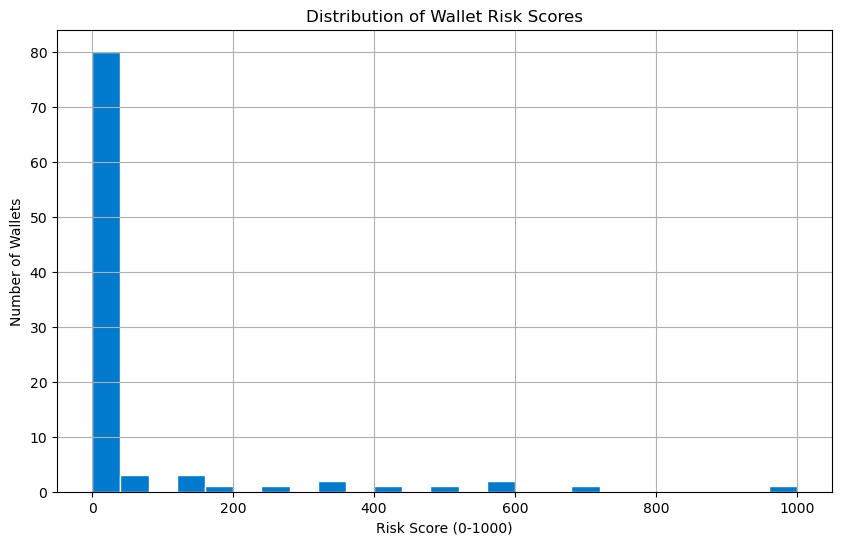

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df["score"], bins=25, color="#007acc", edgecolor="white")
plt.title("Distribution of Wallet Risk Scores")
plt.xlabel("Risk Score (0-1000)")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.savefig("../output/score_histogram.png")
plt.show()

In [8]:
# Merge scores with features for breakdown
features_df = pd.read_csv("../data/wallet_features.csv")
scores_df = pd.read_csv("../output/wallet_scores.csv")


In [12]:

top_risk = scores_df.sort_values(by="score", ascending=False).head(10)
top_risk_full = pd.merge(top_risk, features_df, on="wallet_address")


In [22]:
top_risk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wallet_address           10 non-null     object 
 1   score                    10 non-null     int64  
 2   total_supply_value       10 non-null     float64
 3   supply_count             10 non-null     int64  
 4   total_borrow_value       10 non-null     float64
 5   borrow_count             10 non-null     int64  
 6   total_repay_value        10 non-null     float64
 7   repay_count              10 non-null     int64  
 8   total_withdraw_value     10 non-null     float64
 9   withdraw_count           10 non-null     int64  
 10  total_liquidation_value  10 non-null     float64
 11  liquidation_count        10 non-null     int64  
 12  first_tx_time            10 non-null     int64  
 13  last_tx_time             10 non-null     int64  
 14  total_tx_count           10 n

In [ ]:
# After merging scores & features
top_risk_full = pd.merge(top_risk, features_df, on="wallet_address")

# Derive the missing columns
top_risk_full["net_borrowed"] = (
    top_risk_full["total_borrow_value"] - top_risk_full["total_repay_value"]
)
top_risk_full["avg_time_between_tx"] = (
    top_risk_full["last_tx_time"] - top_risk_full["first_tx_time"]
) / top_risk_full["total_tx_count"].clip(lower=1)

# Now you can safely select them
display_cols = [
    "wallet_address",
    "score",
    "net_borrowed",
    "avg_time_between_tx", 
    "liquidation_count",
    "borrow_count",
]

top_risk_full[display_cols]

,wallet_address,score,net_borrowed,avg_time_between_tx,liquidation_count,borrow_count
0,0x9ba0d85f71e145ccf15225e59631e5a883d5d74a,1000,0.000000e+00,7.263685e+07,0,1
1,0x6a2752a534faacaaa153bffbb973dd84e0e5497b,691,0.000000e+00,1.912201e+07,0,0
2,0x4814be124d7fe3b240eb46061f7ddfab468fe122,585,3.410497e+17,1.859610e+05,0,24
3,0x70d8e4ab175dfe0eab4e9a7f33e0a2d19f44001e,580,2.505361e+17,1.665938e+05,0,24
4,0xa98dc64bb42575efec7d1e4560c029231ce5da51,497,0.000000e+00,1.408935e+07,0,0
5,0xdde73df7bd4d704a89ad8421402701b3a460c6e9,429,0.000000e+00,1.230704e+07,0,0
6,0x427f2ac5fdf4245e027d767e7c3ac272a1f40a65,351,0.000000e+00,2.381193e+06,0,12
7,0x330513970efd9e8dd606275fb4c50378989b3204,339,0.000000e+00,6.005970e+06,0,6
8,0xf340b9f2098f80b86fbc5ede586c319473aa11f3,271,0.000000e+00,2.270013e+06,0,9
9,0xcbbd9fe837a14258286bbf2e182cbc4e4518c5a3,160,0.000000e+00,7.105952e+05,0,7


In [27]:
top_scores = scores_df.sort_values("score", ascending=False).head(10)
top_full   = pd.merge(top_scores, features_df, on="wallet_address")
top_full["net_borrowed"] = top_full["total_borrow_value"] - top_full["total_repay_value"]
top_full["avg_time_between_tx"] = (
    top_full["last_tx_time"] - top_full["first_tx_time"]
) / top_full["total_tx_count"].clip(lower=1)

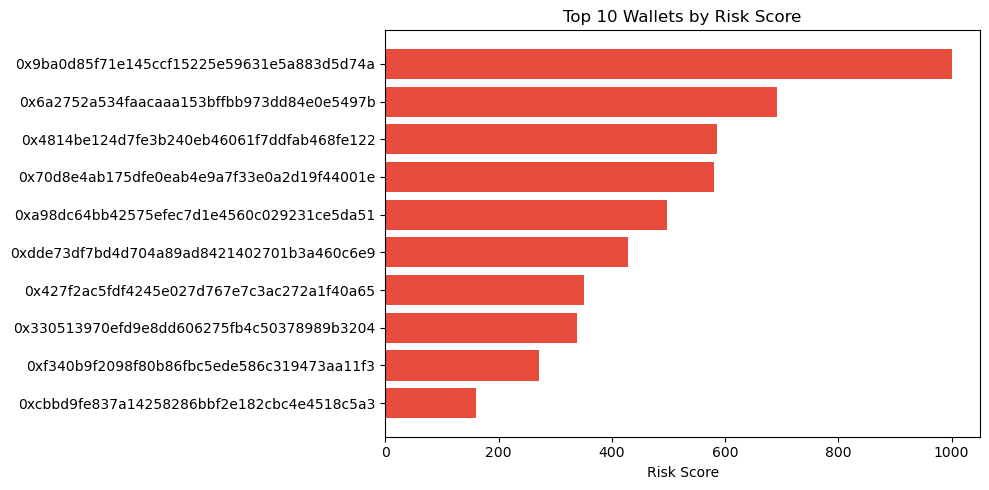

In [28]:
plt.figure(figsize=(10, 5))
plt.barh(top_full["wallet_address"], top_full["score"], color="#e74c3c")
plt.xlabel("Risk Score")
plt.title("Top 10 Wallets by Risk Score")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()


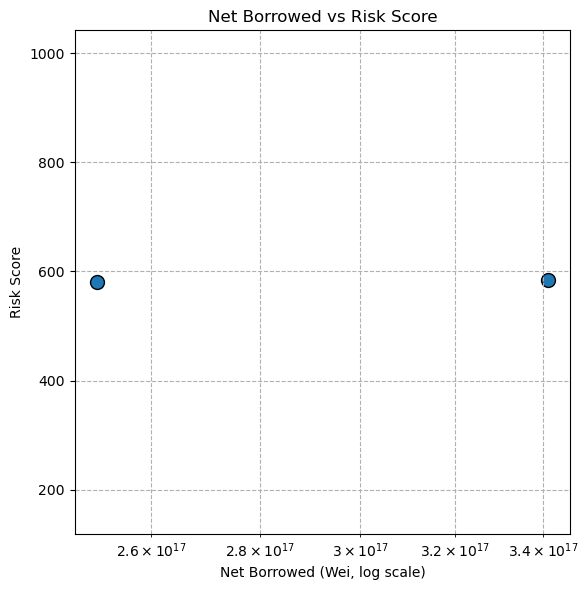

In [29]:

# Scatter: Net Borrowed vs Score
plt.figure(figsize=(6, 6))
plt.scatter(top_full["net_borrowed"], top_full["score"], s=100, edgecolor="black")
plt.xscale("log")  # log-scale helps when net_borrowed spans many orders
plt.xlabel("Net Borrowed (Wei, log scale)")
plt.ylabel("Risk Score")
plt.title("Net Borrowed vs Risk Score")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


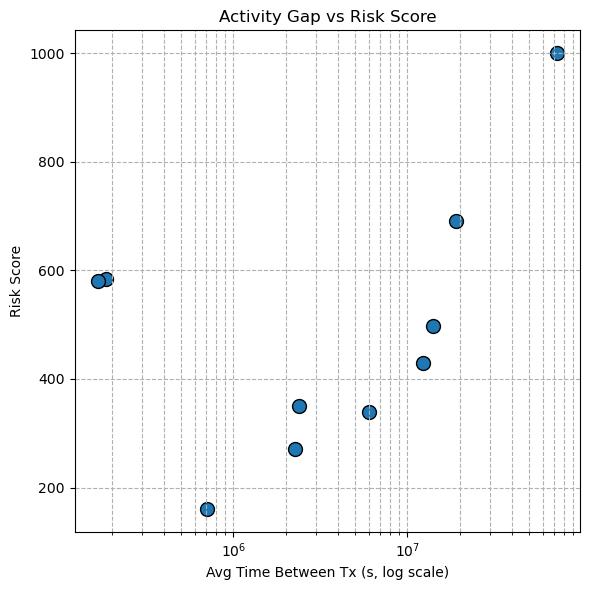

In [30]:

# Scatter: Avg Time Between Tx vs Score
plt.figure(figsize=(6, 6))
plt.scatter(top_full["avg_time_between_tx"], top_full["score"], s=100, edgecolor="black")
plt.xscale("log")  # many wallets are very active, some very dormant
plt.xlabel("Avg Time Between Tx (s, log scale)")
plt.ylabel("Risk Score")
plt.title("Activity Gap vs Risk Score")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


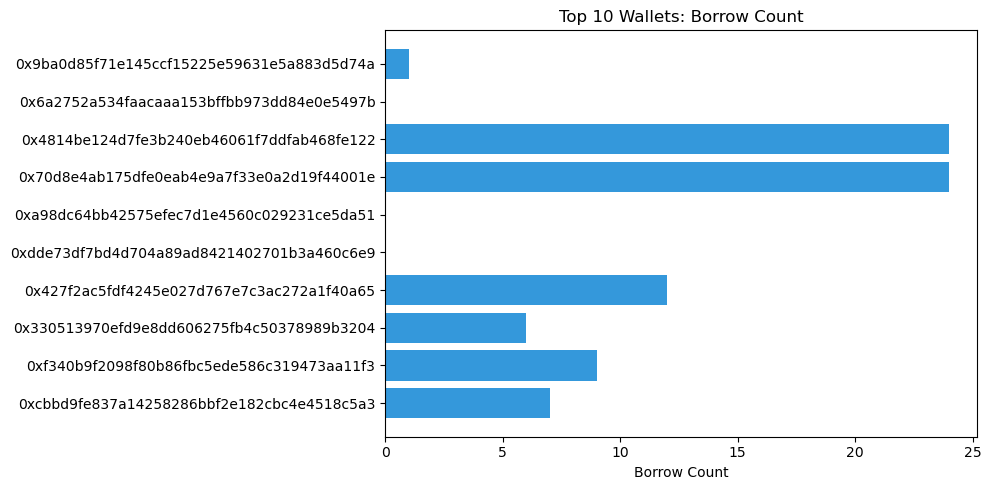

In [31]:
# Bar chart: Borrow Count vs Wallet
plt.figure(figsize=(10, 5))
plt.barh(top_full["wallet_address"], top_full["borrow_count"], color="#3498db")
plt.xlabel("Borrow Count")
plt.title("Top 10 Wallets: Borrow Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
#  Derive additional metrics
features_df["net_borrowed"] = features_df["total_borrow_value"] - features_df["total_repay_value"]
features_df["avg_time_between_tx"] = (
    features_df["last_tx_time"] - features_df["first_tx_time"]
) / features_df["total_tx_count"].clip(lower=1)

In [18]:

# Features to plot
features_to_plot = [
    ("net_borrowed", "Net Borrowed (Wei)"),
    ("avg_time_between_tx", "Avg Time Between Tx (seconds)"),
    ("liquidation_count", "Liquidation Count"),
    ("borrow_count", "Borrow Count"),
]

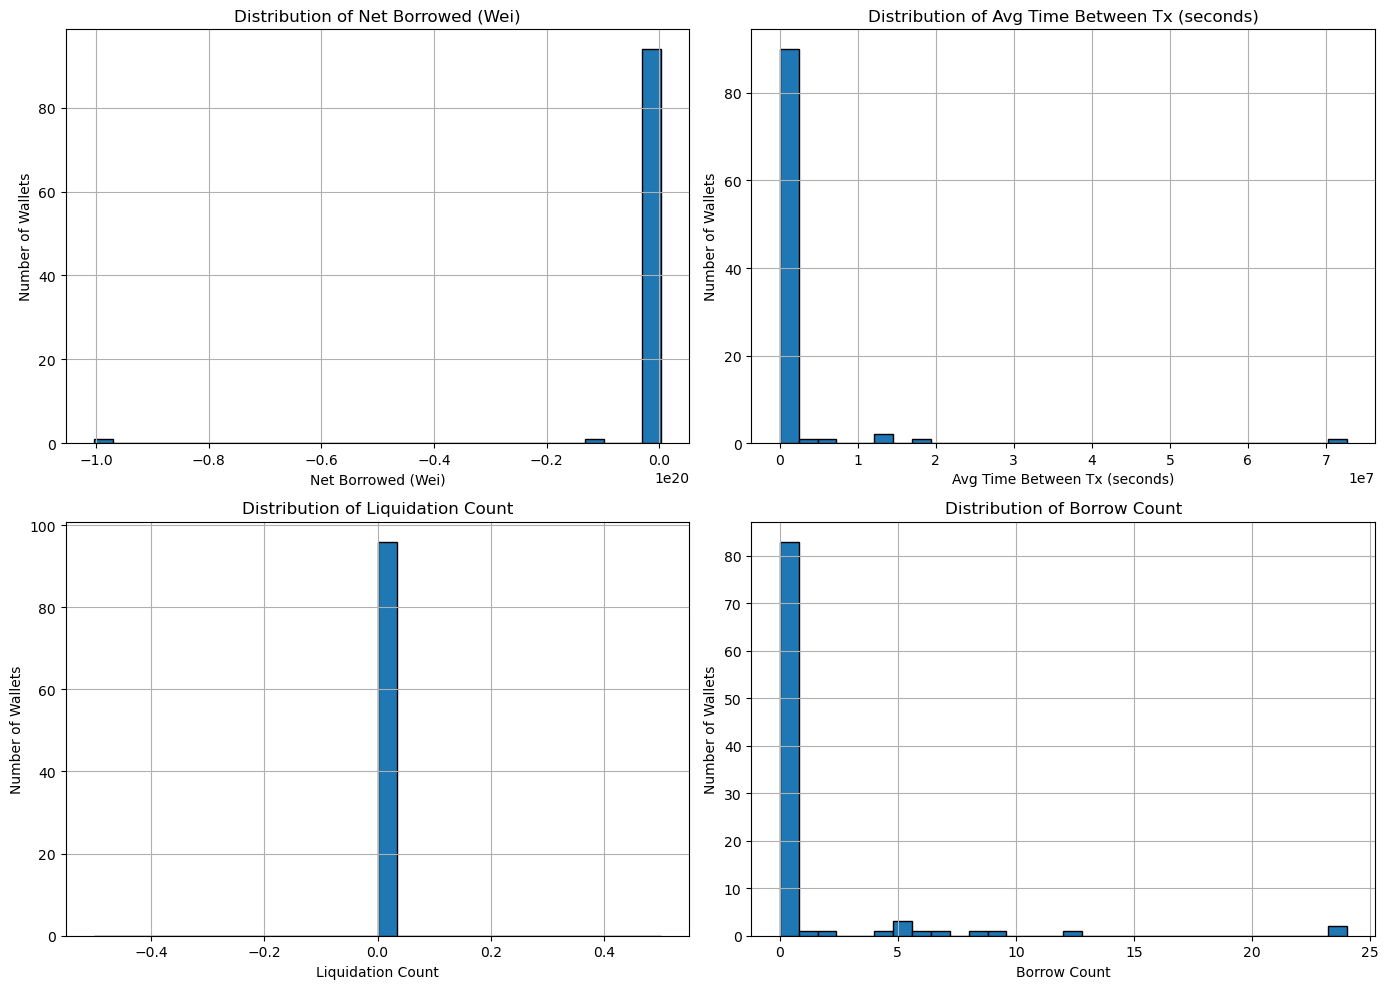

In [20]:

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (col, label) in zip(axes, features_to_plot):
    data = features_df[col].dropna()
    ax.hist(data, bins=30, edgecolor="black")
    ax.set_title(f"Distribution of {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Number of Wallets")
    ax.grid(True)

plt.savefig("../output/plot.png")
plt.tight_layout()
plt.show()
